<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/Decisisontree(Fraudcheck).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
### Load the required libraries
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn import preprocessing
from sklearn import tree

In [148]:
#importing dataset
fraud = pd.read_csv("/content/Fraud_check (1).csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [149]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [150]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [151]:
# Creating dummy vairables for Categorical columns
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [152]:
# Creating new column TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [153]:
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [154]:
# Creating a new column
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


In [155]:
# Defining Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [156]:
# Normaliizng  the data
fraud_norm = norm_func(fraud.iloc[:,1:])
fraud_norm.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


In [157]:
# Declaring features & target
X = fraud_norm.drop(['TaxInc_Good'], axis=1)
y = fraud_norm['TaxInc_Good']

In [158]:
# Converting the Taxable income variable to bucketing. 
fraud_norm["income"]="<=30000"
fraud_norm.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [159]:
# Converting the Taxable income variable to bucketing. 
fraud_norm["income"]="<=30000"
fraud_norm.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [160]:
# Droping the Taxable income column
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [161]:
# Renaming the column
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [162]:
# Splitting the data into featuers and labels
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [163]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [164]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

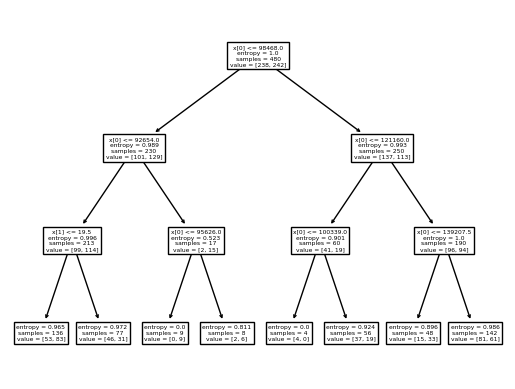

In [165]:
# PLotting the decision tree
from sklearn import tree
tree.plot_tree(model);

In [166]:
#model 1-Entropy based splits
dt1_entropy = tree.DecisionTreeClassifier(criterion='entropy',max_depth =3)
dt1_entropy.fit(x_train, y_train)
print('Train Accuracy =',dt1_entropy.score(x_train, y_train))
print('Test Accuracy =',dt1_entropy.score(x_test, y_test))


Train Accuracy = 0.6229166666666667
Test Accuracy = 0.5


Building Decision Tree Classifier (CART) using Gini Criteria

In [167]:
# Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    78
1    42
dtype: int64

In [168]:
preds

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=uint8)

In [169]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,39,21
1,39,21


In [170]:
# Accuracy 
np.mean(preds==y_test)

0.5

In [171]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [172]:
# Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5

In [173]:
## Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix
print("Train - Confusion Matrix")
print(confusion_matrix(y_train,model_gini.predict(x_train)))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,model_gini.predict(x_test)))

Train - Confusion Matrix
[[194  44]
 [131 111]]
Test - Confusion Matrix
[[45 15]
 [46 14]]


In [174]:
## Important variables
features = x_train.columns
importances = model_gini.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([x_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4
0,population,experience,Marital.Status_Single,Marital.Status_Married,Undergrad_YES
1,0.780183,0.163704,0.056112,0.0,0.0


In [175]:
importances

array([0.78018331, 0.16370446, 0.        , 0.        , 0.05611223])

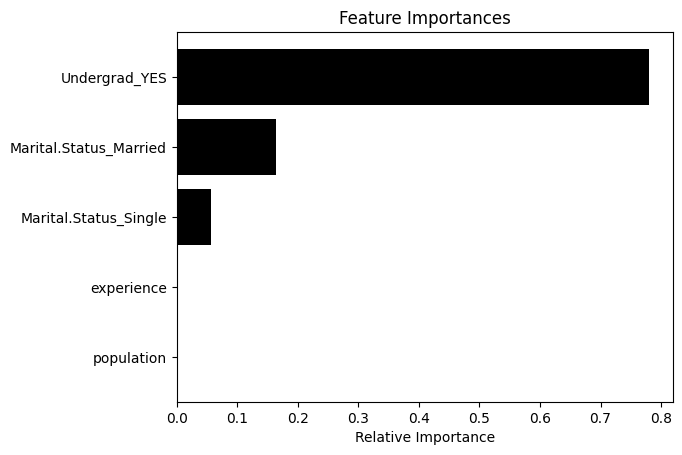

In [176]:
fig, ax = plt.subplots()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices][::-1], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [177]:
#Building Decision Tree Model using Variable Importance
indices

array([0, 1, 4, 3, 2])

In [178]:
select = indices[0:5]
imp_tree = tree.DecisionTreeClassifier(max_depth=3)   ## Instantiating DecisionTree-Classifier
clf = imp_tree.fit(x_train.iloc[:,select], y_train)

In [179]:
print('Train Accuracy =',imp_tree.score(x_train.iloc[:,select], y_train))
print('Test Accuracy =',imp_tree.score(x_test.iloc[:,select], y_test))

Train Accuracy = 0.6354166666666666
Test Accuracy = 0.49166666666666664


In [180]:
## Randomized Hyper-parameter search with cross-validation
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

dt = tree.DecisionTreeClassifier() 

param_grid = {'criterion':['gini','entropy'],
             'max_leaf_nodes': np.arange(5,30,1),
             'max_depth':np.arange(3,15,1),
             }


rsearch_acc = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=500)
rsearch_acc.fit(x_train, y_train)

print(rsearch_acc.best_estimator_)
print('Train Accuracy =',rsearch_acc.best_score_)
print('Test Accuracy =',rsearch_acc.score(x_test, y_test))

print("Train - Confusion Matrix")
print(confusion_matrix(y_train,rsearch_acc.predict(x_train)))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,rsearch_acc.predict(x_test)))

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=26)
Train Accuracy = 0.5625
Test Accuracy = 0.525
Train - Confusion Matrix
[[159  79]
 [ 69 173]]
Test - Confusion Matrix
[[33 27]
 [30 30]]


In [181]:
### Making predictions
predicted= pd.DataFrame(rsearch_acc.predict(x_train))
fraud['predicted'] = predicted
fraud.to_csv("fraud_predictions.csv")